## Biblioteca importadas

In [1]:
import numpy as np  
import pandas as pd 
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt


## Leitura das bases de dados de cada aeroportos


#### Frequencia de passageiros no aeroporto CWB

In [2]:
#nacional 
filename = r'C:Passageiros pagos\cwb_nac.xlsx'
cwb_nac = pd.read_excel(filename).drop(["Unnamed: 0"],axis=1)

#internacional
filename = r'C:Passageiros pagos\cwb_int.xlsx'
cwb_int = (pd.read_excel(filename)
 .drop(["Unnamed: 0"],axis=1)
 .rename(columns ={'Passageiros':'Passageiros internacionais'})
          )


#### Frequencia de passageiros no aeroporto IGU

In [3]:
#nacional
filename = r'C:Passageiros pagos\igu_nac.xlsx'
igu_nac = pd.read_excel(filename).drop(["Unnamed: 0"],axis=1)

#internacional
filename = r'C:Passageiros pagos\igu_int.xlsx'
igu_int = (pd.read_excel(filename)
 .drop(["Unnamed: 0"],axis=1)
 .rename(columns ={'Passageiros':'Passageiros internacionais'})
          )

#### Frequencia de passageiros no aeroporto NVT

In [4]:
#nacional
filename = r'C:Passageiros pagos\nvt_nac.xlsx'
nvt_nac = pd.read_excel(filename).drop(["Unnamed: 0"],axis=1)

#internacional
filename = r'C:Passageiros pagos\nvt_int.xlsx'
nvt_int = (pd.read_excel(filename)
 .drop(["Unnamed: 0"],axis=1)
 .rename(columns ={'Passageiros':'Passageiros internacionais'})
          )

#### Frequencia de passageiros no aeroporto PMW

In [5]:
filename = r'C:Passageiros pagos\pmw.xlsx'
pmw = pd.read_excel(filename).drop(["Unnamed: 0"],axis=1)

#### Frequencia de passageiros no aeroporto SLZ

In [6]:
filename = r'C:Passageiros pagos\slz.xlsx'
slz = pd.read_excel(filename).drop(["Unnamed: 0"],axis=1)

#### Frequencia de passageiros no aeroporto SJO

In [7]:
##nacional
#filename = r'C:\Users\vitor\OneDrive\Documentos\INSPER_JR\Decolagem_I\regressão\Passageiros pagos\sjo_nac.csv'
#dados7 = pd.read_csv(filename)

##internacional
#filename = r'C:\Users\vitor\OneDrive\Documentos\INSPER_JR\Decolagem_I\regressão\Passageiros pagos\sjo_int.csv'
#dados6 = pd.read_csv(filename)



## Variaveis macro economicas

#### Valor do barril de petróleo

In [8]:
filename = r'C:Dados macros\statistic_id262858_opec-oil-price-annually-1960-2022.xlsx'
oil = pd.read_excel(filename)

#### Cotação do dolar

In [9]:
filename = r'C:Dados macros\Base de dados Dólar.xlsx'
dolar = pd.read_excel(filename)

#### Inflação do turismo no Brasil

In [10]:
filename = r'C:Dados macros\statistic_id270812_inflation-rate-in-brazil-2027.xlsx'
inflacao = pd.read_excel(filename)

#### PIB do Brasil e dos Estados dos aeroportos 

In [11]:
filename = r'C:Dados macros\PIB_brasil_freq.xlsx'
pib = pd.read_excel(filename)

## Curitiba

##### juntando os pontos macros e uma unico DataFrame

In [12]:
principal_cwb =(cwb_nac
 .join(cwb_int.set_index('Ano'),on='Ano')
 .join(oil.set_index('Ano'),on='Ano')
 .join(dolar.set_index('Ano'),on='Ano')
 .join(inflacao.set_index('Ano'),on='Ano')
 .join(pib.set_index('Ano'),on='Ano')
          )


#### Correlação entre os dados pré selecionados 

In [13]:
principal_cwb = principal_cwb.loc[principal_cwb["Ano"]<2020]
principal_cwb.corr()


,Ano,Passageiros,Passageiros_freq,Passageiros internacionais,Oil,dolar,inflacao,PIB REAL BRASIL
Ano,1.000000,0.825633,-0.502786,0.537493,0.498046,0.462911,-0.379601,-0.313397
Passageiros,0.825633,1.000000,-0.334966,0.747097,0.757172,0.089808,-0.283610,-0.192897
Passageiros_freq,-0.502786,-0.334966,1.000000,-0.089302,-0.053763,-0.623398,0.044637,0.307437
Passageiros internacionais,0.537493,0.747097,-0.089302,1.000000,0.769081,-0.233850,-0.354779,0.176821
Oil,0.498046,0.757172,-0.053763,0.769081,1.000000,-0.336762,-0.422720,0.289631
dolar,0.462911,0.089808,-0.623398,-0.233850,-0.336762,1.000000,0.166638,-0.483029
inflacao,-0.379601,-0.283610,0.044637,-0.354779,-0.422720,0.166638,1.000000,-0.353883
PIB REAL BRASIL,-0.313397,-0.192897,0.307437,0.176821,0.289631,-0.483029,-0.353883,1.000000


#### Análise grafica

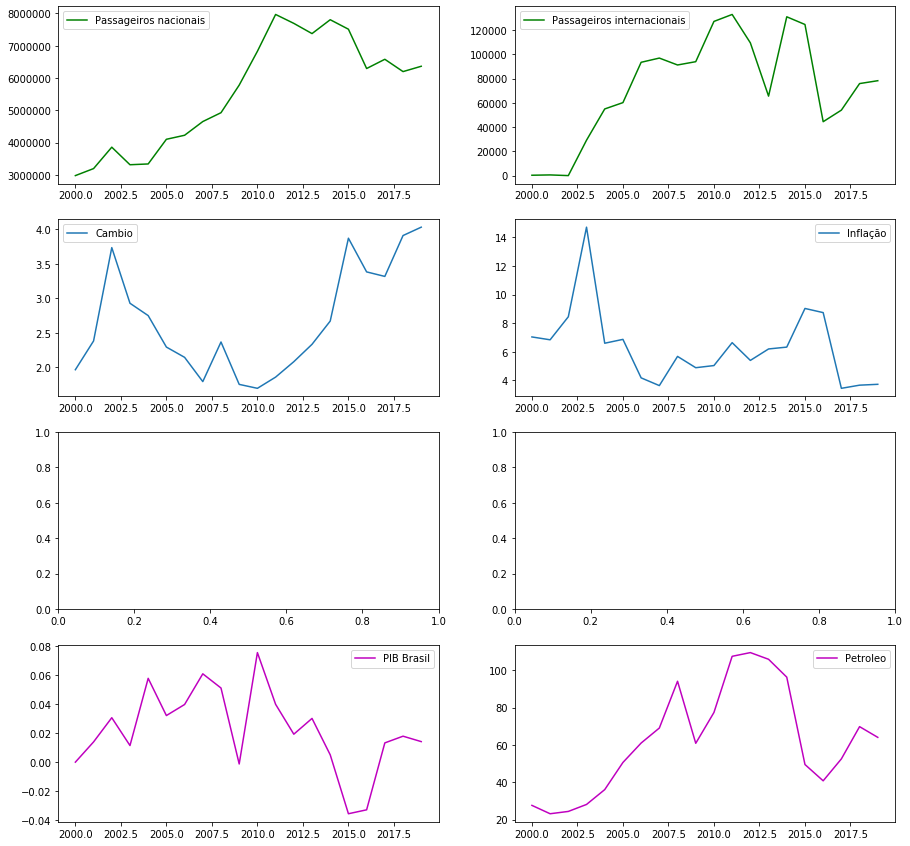

In [14]:
fig, ax = plt.subplots(4,2)

fig.set_size_inches(15,15)



ax[0,0].plot(principal_cwb["Ano"], principal_cwb["Passageiros"],"g", label='Passageiros nacionais')
ax[0,0].legend()

ax[0,1].plot(principal_cwb["Ano"], principal_cwb["Passageiros internacionais"],"g", label = 'Passageiros internacionais' )
ax[0,1].legend()


ax[1,0].plot(principal_cwb["Ano"], principal_cwb["dolar"], label = 'Cambio' )
ax[1,0].legend()

ax[1,1].plot(principal_cwb["Ano"], principal_cwb["inflacao"], label='Inflação')
ax[1,1].legend()

#ax[2,0].plot(principal["Ano"], principal["PIB REAL PR"],"c", label = 'PIB PR' )
#ax[2,0].legend()

#ax[2,1].plot(principal["Ano"], principal["PIB REAL SP"],"c", label = 'PIB SP ' )
#ax[2,1].legend()

ax[3,0].plot(principal_cwb["Ano"], principal_cwb["PIB REAL BRASIL"],"m", label = 'PIB Brasil' )
ax[3,0].legend()

ax[3,1].plot(principal_cwb["Ano"], principal_cwb["Oil"],"m", label='Petroleo')
ax[3,1].legend()

plt.show()

In [15]:
Y= principal_cwb["Passageiros"].loc[principal_cwb["Ano"]<2020].copy()
X= principal_cwb.drop(["Passageiros", "Passageiros internacionais","Ano"],axis=1).loc[principal_cwb["Ano"]<2020].copy()

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.75, random_state=42)

In [17]:
reg= LinearRegression()
reg.fit(X_train, y_train)
YpredL= reg.predict(X_test)
print(YpredL)
print(y_test)
print(reg.intercept_, reg.coef_)


[11777343.82833007   265044.25360337 11450411.49939277  8621540.55633584
  5450922.90998838 10450895.6182688  11214398.65934837 25867600.21446095
 -2466202.95548006 10501842.82048114  7625780.22873913 11115818.80217108
  6136609.76087868  3981525.00051184  6552544.12760809]
0     2981167
17    6580928
15    7511752
1     3198439
8     4927837
5     4105119
11    7968244
3     3317577
18    6200060
16    6295255
13    7376152
2     3860727
9     5782028
19    6364930
4     3341621
Name: Passageiros, dtype: int64
4504414.2149261795 [-10454310.7940673     -16793.2851      -3475437.82858628
   2178596.15972037   3882703.82146638]


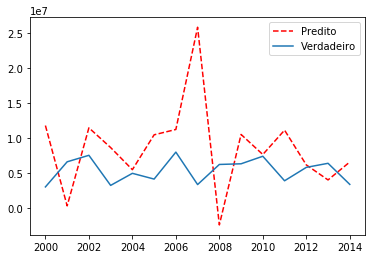

In [18]:
ano_lista = np.arange(2000,2015,1)


plt.plot(ano_lista, YpredL,'--r', label='Predito')
plt.plot(ano_lista, y_test, label = 'Verdadeiro' )
plt.legend()
plt.show()


In [19]:
import statsmodels.api as sm

#define response variable
y = principal_cwb["Passageiros"].loc[principal_cwb["Ano"]<2020]

#define predictor variables
x = principal_cwb.drop(["Passageiros", "Passageiros internacionais","Ano"],axis=1).loc[principal_cwb["Ano"]<2020]

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Passageiros   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     11.48
Date:                Tue, 15 Nov 2022   Prob (F-statistic):           0.000150
Time:                        18:59:06   Log-Likelihood:                -298.86
No. Observations:                  20   AIC:                             609.7
Df Residuals:                      14   BIC:                             615.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.771e+06   1.64e+06  

C:\Users\vitor\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2629: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


## Foz do Iguaçu

##### juntando os pontos macros e uma unico DataFrame

In [20]:
principal_igu =(igu_nac
 .join(igu_int.set_index('Ano'),on='Ano')
 .join(oil.set_index('Ano'),on='Ano')
 .join(dolar.set_index('Ano'),on='Ano')
 .join(inflacao.set_index('Ano'),on='Ano')
 .join(pib.set_index('Ano'),on='Ano')
          )

##### Correlação entre os dados pré selecionados 

In [21]:
principal_igu = principal_igu.loc[principal_igu["Ano"]<2020]

principal_igu.corr()


,Ano,Passageiros,Passageiros_freq,Passageiros internacionais,Oil,dolar,inflacao,PIB REAL BRASIL
Ano,1.000000,0.959895,-0.026026,0.851291,0.532468,0.364746,-0.322065,-0.312149
Passageiros,0.959895,1.000000,-0.193904,0.929856,0.508822,0.399424,-0.267412,-0.369673
Passageiros_freq,-0.026026,-0.193904,1.000000,-0.270648,-0.057936,-0.177536,0.081343,0.279054
Passageiros internacionais,0.851291,0.929856,-0.270648,1.000000,0.394946,0.517119,-0.192176,-0.385805
Oil,0.532468,0.508822,-0.057936,0.394946,1.000000,-0.375298,-0.431958,0.291195
dolar,0.364746,0.399424,-0.177536,0.517119,-0.375298,1.000000,0.298223,-0.500866
inflacao,-0.322065,-0.267412,0.081343,-0.192176,-0.431958,0.298223,1.000000,-0.381444
PIB REAL BRASIL,-0.312149,-0.369673,0.279054,-0.385805,0.291195,-0.500866,-0.381444,1.000000


##### Análise grafica

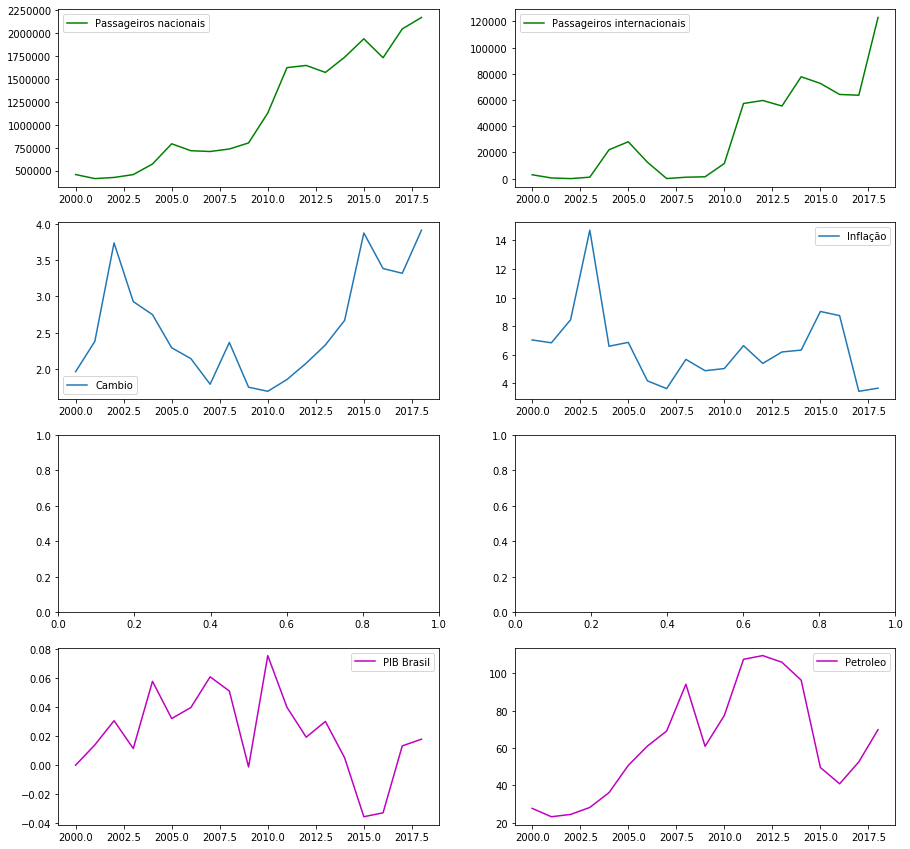

In [22]:
fig, ax = plt.subplots(4,2)

fig.set_size_inches(15,15)



ax[0,0].plot(principal_igu["Ano"], principal_igu["Passageiros"],"g", label='Passageiros nacionais')
ax[0,0].legend()

ax[0,1].plot(principal_igu["Ano"], principal_igu["Passageiros internacionais"],"g", label = 'Passageiros internacionais' )
ax[0,1].legend()


ax[1,0].plot(principal_igu["Ano"], principal_igu["dolar"], label = 'Cambio' )
ax[1,0].legend()

ax[1,1].plot(principal_igu["Ano"], principal_igu["inflacao"], label='Inflação')
ax[1,1].legend()

#ax[2,0].plot(principal["Ano"], principal["PIB REAL PR"],"c", label = 'PIB PR' )
#ax[2,0].legend()
#
#ax[2,1].plot(principal["Ano"], principal["PIB REAL SP"],"c", label = 'PIB SP ' )
#ax[2,1].legend()
#
ax[3,0].plot(principal_igu["Ano"], principal_igu["PIB REAL BRASIL"],"m", label = 'PIB Brasil' )
ax[3,0].legend()

ax[3,1].plot(principal_igu["Ano"], principal_igu["Oil"],"m", label='Petroleo')
ax[3,1].legend()

plt.show()

In [23]:
Y= principal_igu["Passageiros"].copy()
X= principal_igu.drop(["Passageiros", "Passageiros internacionais","Ano"],axis=1).loc[principal_igu["Ano"]<2020].copy()

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=42)

In [25]:
reg= LinearRegression()
reg.fit(X_train, y_train)
YpredL= reg.predict(X_test)
print(YpredL)
print(y_test)


[-637484.7138979   122749.3569424  1327775.4057566  -326852.81896252
 1529577.28498527  705591.347234   -596163.93623069 1756534.19375125
  904969.61125245 1438289.98416577]
0      456034
5      791705
11    1623226
1      411660
8      734807
16    1731066
3      455380
13    1570912
15    1937928
17    2045897
Name: Passageiros, dtype: int64


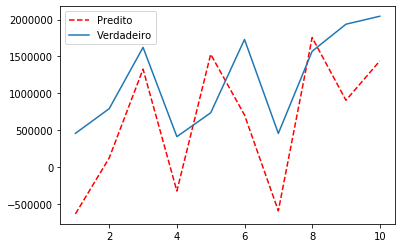

In [26]:
ano_lista= np.arange(1,11,1)


plt.plot(ano_lista, YpredL,'--r', label='Predito')
plt.plot(ano_lista, y_test, label = 'Verdadeiro' )
plt.legend()
plt.show()

In [27]:
import statsmodels.api as sm

#define response variable
y = principal_igu["Passageiros"].loc[principal_igu["Ano"]<2020]

#define predictor variables
x = principal_igu.drop(["Passageiros", "Passageiros internacionais","Ano"],axis=1).loc[principal_igu["Ano"]<2020]

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Passageiros   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     11.36
Date:                Tue, 15 Nov 2022   Prob (F-statistic):           0.000224
Time:                        18:59:09   Log-Likelihood:                -263.96
No. Observations:                  19   AIC:                             539.9
Df Residuals:                      13   BIC:                             545.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -3.891e+05   5.18e+05  

C:\Users\vitor\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2629: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\vitor\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  "anyway, n=%i" % int(n))


## Navegantes

##### juntando os pontos macros e uma unico DataFrame

In [28]:
principal_nvt =(nvt_nac
 .join(nvt_int.set_index('Ano'),on='Ano')
 .join(oil.set_index('Ano'),on='Ano')
 .join(dolar.set_index('Ano'),on='Ano')
 .join(inflacao.set_index('Ano'),on='Ano')
 .join(pib.set_index('Ano'),on='Ano')
          )

##### Correlação entre os dados pré selecionados 

In [29]:
principal_nvt= principal_nvt.loc[principal_nvt["Ano"]<2020]

principal_nvt.corr()

,Ano,Passageiros,Passageiros_freq,Passageiros internacionais,Oil,dolar,inflacao,PIB REAL BRASIL
Ano,1.000000,0.874199,0.064870,0.440303,0.498046,0.462911,-0.379601,-0.313397
Passageiros,0.874199,1.000000,-0.260042,0.499191,0.326950,0.522662,-0.296078,-0.468676
Passageiros_freq,0.064870,-0.260042,1.000000,-0.142914,0.310478,-0.325358,0.007955,0.243928
Passageiros internacionais,0.440303,0.499191,-0.142914,1.000000,0.046403,0.482121,-0.332472,-0.043932
Oil,0.498046,0.326950,0.310478,0.046403,1.000000,-0.336762,-0.422720,0.289631
dolar,0.462911,0.522662,-0.325358,0.482121,-0.336762,1.000000,0.166638,-0.483029
inflacao,-0.379601,-0.296078,0.007955,-0.332472,-0.422720,0.166638,1.000000,-0.353883
PIB REAL BRASIL,-0.313397,-0.468676,0.243928,-0.043932,0.289631,-0.483029,-0.353883,1.000000


##### Análise grafica

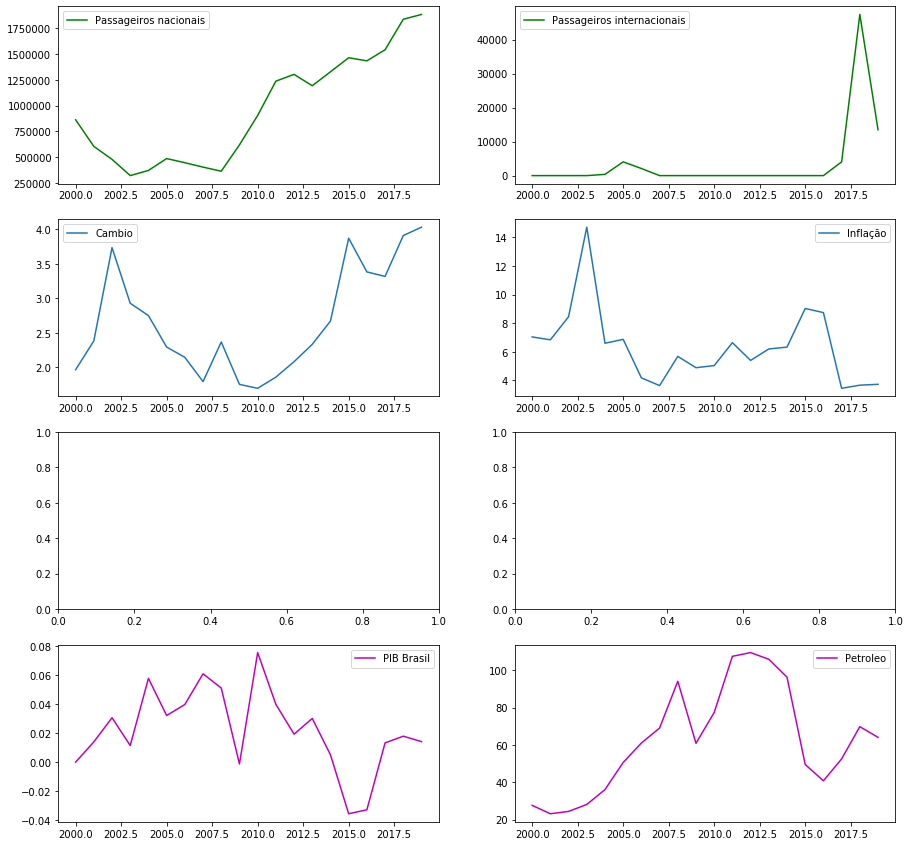

In [30]:
fig, ax = plt.subplots(4,2)

fig.set_size_inches(15,15)



ax[0,0].plot(principal_nvt["Ano"], principal_nvt["Passageiros"],"g", label='Passageiros nacionais')
ax[0,0].legend()

ax[0,1].plot(principal_nvt["Ano"], principal_nvt["Passageiros internacionais"],"g", label = 'Passageiros internacionais' )
ax[0,1].legend()


ax[1,0].plot(principal_nvt["Ano"], principal_nvt["dolar"], label = 'Cambio' )
ax[1,0].legend()

ax[1,1].plot(principal_nvt["Ano"], principal_nvt["inflacao"], label='Inflação')
ax[1,1].legend()

#ax[2,0].plot(principal["Ano"], principal["PIB REAL SC"],"c", label = 'PIB SC' )
#ax[2,0].legend()
#
#ax[2,1].plot(principal["Ano"], principal["PIB REAL SP"],"c", label = 'PIB SP ' )
#ax[2,1].legend()

ax[3,0].plot(principal_nvt["Ano"], principal_nvt["PIB REAL BRASIL"],"m", label = 'PIB Brasil' )
ax[3,0].legend()

ax[3,1].plot(principal_nvt["Ano"], principal_nvt["Oil"],"m", label='Petroleo')
ax[3,1].legend()

plt.show()

In [31]:
Y= principal_nvt["Passageiros"].copy()
X= principal_nvt.drop(["Passageiros", "Passageiros internacionais","Ano"],axis=1).loc[principal_nvt["Ano"]<2020].copy()

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=42)

In [33]:
reg= LinearRegression()
reg.fit(X_train, y_train)
YpredL= reg.predict(X_test)
print(YpredL)
print(y_test)

[-656279.61355872 1589712.99734613 1068854.89866527 -339585.92122083
 1603903.92267192  135173.2293289   899035.28481949 -684462.30612107
 2188334.54385561  654460.82700463]
0      861385
17    1541221
15    1463783
1      603000
8      361877
5      484669
11    1236587
3      319266
18    1837706
16    1433956
Name: Passageiros, dtype: int64


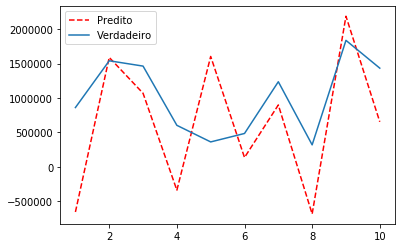

In [34]:
ano_lista= np.arange(1,11,1)


plt.plot(ano_lista, YpredL,'--r', label='Predito')
plt.plot(ano_lista, y_test, label = 'Verdadeiro' )
plt.legend()
plt.show()

In [35]:
import statsmodels.api as sm

#define response variable
y = principal_nvt["Passageiros"].loc[principal_nvt["Ano"]<2020]

#define predictor variables
x = principal_nvt.drop(["Passageiros", "Passageiros internacionais","Ano"],axis=1).loc[principal_nvt["Ano"]<2020]

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Passageiros   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     9.852
Date:                Tue, 15 Nov 2022   Prob (F-statistic):           0.000335
Time:                        18:59:11   Log-Likelihood:                -276.20
No. Observations:                  20   AIC:                             564.4
Df Residuals:                      14   BIC:                             570.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              7.838e+04   4.65e+0

C:\Users\vitor\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2629: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


## Palmas

##### juntando os pontos macros e uma unico DataFrame

In [36]:
principal_pmw =(pmw
 .join(oil.set_index('Ano'),on='Ano')
 .join(dolar.set_index('Ano'),on='Ano')
 .join(inflacao.set_index('Ano'),on='Ano')
 .join(pib.set_index('Ano'),on='Ano')
          )

##### Correlação entre os dados pré selecionados 

In [37]:
principal_pmw= principal_pmw.loc[principal_pmw["Ano"]<2020]
principal_pmw.corr()

,Ano,Passageiros,Passageiros_freq,Oil,dolar,inflacao,PIB REAL BRASIL
Ano,1.000000,0.942935,-0.249136,0.498046,0.462911,-0.379601,-0.313397
Passageiros,0.942935,1.000000,-0.337393,0.546518,0.365772,-0.344995,-0.399778
Passageiros_freq,-0.249136,-0.337393,1.000000,-0.229596,0.019682,0.743224,-0.044255
Oil,0.498046,0.546518,-0.229596,1.000000,-0.336762,-0.422720,0.289631
dolar,0.462911,0.365772,0.019682,-0.336762,1.000000,0.166638,-0.483029
inflacao,-0.379601,-0.344995,0.743224,-0.422720,0.166638,1.000000,-0.353883
PIB REAL BRASIL,-0.313397,-0.399778,-0.044255,0.289631,-0.483029,-0.353883,1.000000


##### Análise grafica

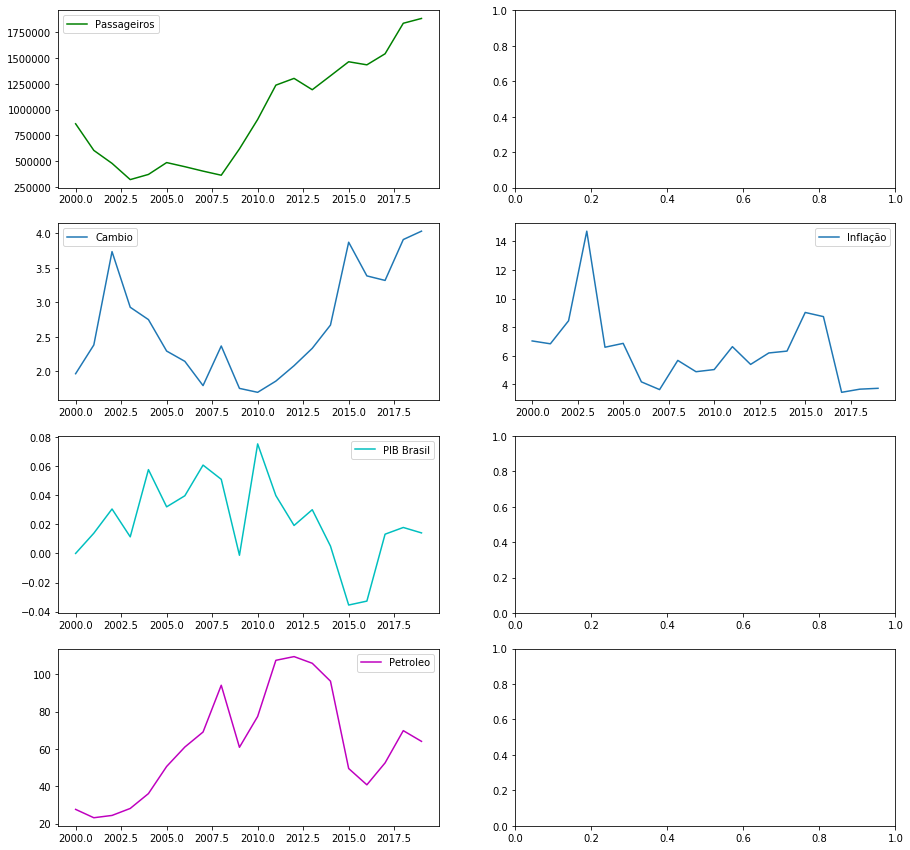

In [38]:
fig, ax = plt.subplots(4,2)

fig.set_size_inches(15,15)


ax[0,0].plot(principal_nvt["Ano"], principal_nvt["Passageiros"],"g", label='Passageiros')
ax[0,0].legend()

#ax[0,1].plot(principal["Ano"], principal["PIB REAL TO"],"g", label='PIB TO')
#ax[0,1].legend()

ax[1,0].plot(principal_nvt["Ano"], principal_nvt["dolar"], label = 'Cambio' )
ax[1,0].legend()

ax[1,1].plot(principal_nvt["Ano"], principal_nvt["inflacao"], label='Inflação')
ax[1,1].legend()

ax[2,0].plot(principal_nvt["Ano"], principal_nvt["PIB REAL BRASIL"],"c", label = 'PIB Brasil' )
ax[2,0].legend()

#ax[2,1].plot(principal["Ano"], principal["PIB REAL SP"],"c", label = 'PIB SP' )
#ax[2,1].legend()

ax[3,0].plot(principal_nvt["Ano"], principal_nvt["Oil"],"m", label='Petroleo')
ax[3,0].legend()



plt.show()#

In [39]:
Y= principal_pmw["Passageiros"].copy()
X= principal_pmw.drop(["Passageiros","Ano"],axis=1).loc[principal_pmw["Ano"]<2020].copy()

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=42)

In [41]:
reg= LinearRegression()
reg.fit(X_train, y_train)
YpredL= reg.predict(X_test)
print(YpredL)
print(y_test)

[-188625.00541265  506150.56177659  431896.83842048 -345191.00235768
  545714.10103294   92712.39749165  528452.98404732 2556997.9396254
  740341.07319453  281271.78132942]
0     128941
17    674712
15    689519
1     115362
8     236840
5     192132
11    495456
3      12098
18    693302
16    642223
Name: Passageiros, dtype: int64


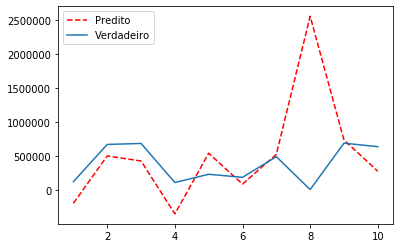

In [42]:
ano_lista= np.arange(1,11,1)


plt.plot(ano_lista, YpredL,'--r', label='Predito')
plt.plot(ano_lista, y_test, label = 'Verdadeiro' )
plt.legend()
plt.show()

In [43]:
import statsmodels.api as sm

#define response variable
y = principal_pmw["Passageiros"].loc[principal_pmw["Ano"]<2020]

#define predictor variables
x = principal_pmw.drop(["Passageiros", "Ano"],axis=1).loc[principal_pmw["Ano"]<2020]

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Passageiros   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     14.92
Date:                Tue, 15 Nov 2022   Prob (F-statistic):           3.50e-05
Time:                        18:59:15   Log-Likelihood:                -258.05
No. Observations:                  20   AIC:                             528.1
Df Residuals:                      14   BIC:                             534.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -4.91e+04   2.11e+05  

C:\Users\vitor\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2629: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


## São Luiz

##### juntando os pontos macros e uma unico DataFrame

In [44]:
principal =(slz
 .join(oil.set_index('Ano'),on='Ano')
 .join(dolar.set_index('Ano'),on='Ano')
 .join(inflacao.set_index('Ano'),on='Ano')
 .join(pib.set_index('Ano'),on='Ano')
          )

##### Correlação entre os dados pré selecionados 

In [45]:
principal= principal.loc[principal["Ano"]<2020]
principal.corr()

,Ano,Passageiros,Passageiros_freq,Oil,dolar,inflacao,PIB REAL BRASIL
Ano,1.000000,0.963178,-0.282992,0.498046,0.462911,-0.379601,-0.313397
Passageiros,0.963178,1.000000,-0.387336,0.474653,0.495322,-0.325744,-0.369737
Passageiros_freq,-0.282992,-0.387336,1.000000,-0.053982,-0.403037,0.244274,0.244649
Oil,0.498046,0.474653,-0.053982,1.000000,-0.336762,-0.422720,0.289631
dolar,0.462911,0.495322,-0.403037,-0.336762,1.000000,0.166638,-0.483029
inflacao,-0.379601,-0.325744,0.244274,-0.422720,0.166638,1.000000,-0.353883
PIB REAL BRASIL,-0.313397,-0.369737,0.244649,0.289631,-0.483029,-0.353883,1.000000


##### Análise grafica

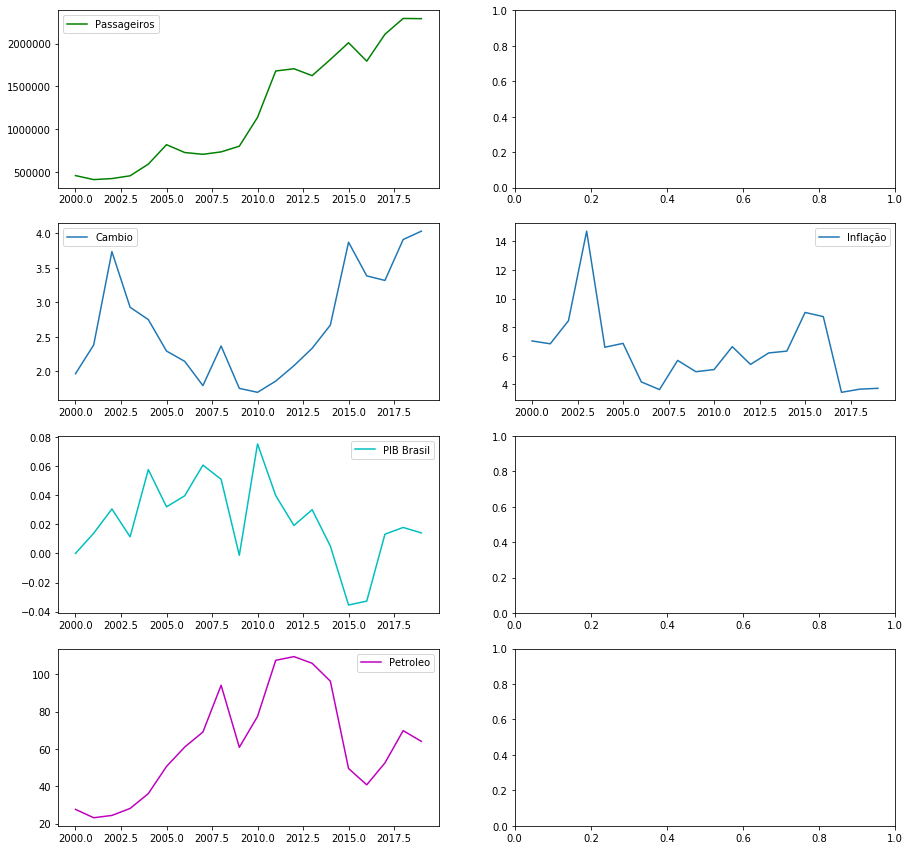

In [46]:
fig, ax = plt.subplots(4,2)

fig.set_size_inches(15,15)


ax[0,0].plot(principal["Ano"], principal["Passageiros"],"g", label='Passageiros')
ax[0,0].legend()

#ax[0,1].plot(principal["Ano"], principal["PIB REAL MA"],"g", label='PIB MA')
#ax[0,1].legend()

ax[1,0].plot(principal["Ano"], principal["dolar"], label = 'Cambio' )
ax[1,0].legend()

ax[1,1].plot(principal["Ano"], principal["inflacao"], label='Inflação')
ax[1,1].legend()

ax[2,0].plot(principal["Ano"], principal["PIB REAL BRASIL"],"c", label = 'PIB Brasil' )
ax[2,0].legend()

#ax[2,1].plot(principal["Ano"], principal["PIB REAL SP"],"c", label = 'PIB SP' )
#ax[2,1].legend()

ax[3,0].plot(principal["Ano"], principal["Oil"],"m", label='Petroleo')
ax[3,0].legend()



plt.show()

In [47]:
Y= principal["Passageiros"].copy()
X= principal.drop(["Passageiros", "Ano"],axis=1).loc[principal["Ano"]<2020].copy()

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=42)

In [49]:
reg= LinearRegression()
reg.fit(X_train, y_train)
YpredL= reg.predict(X_test)
print(YpredL)
print(y_test)

[-1287412.5009031   2308179.87781188   899211.16515587  -696541.04781698
  1553335.16149962  -319653.26682844   930352.8538813  -2024791.85618
  3235454.56144708   610759.84555663]
0      458976
17    2109564
15    2010630
1      412169
8      735876
5      819855
11    1680589
3      456478
18    2294026
16    1795321
Name: Passageiros, dtype: int64


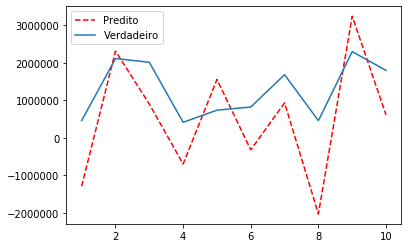

In [50]:
ano_lista= np.arange(1,11,1)


plt.plot(ano_lista, YpredL,'--r', label='Predito')
plt.plot(ano_lista, y_test, label = 'Verdadeiro' )
plt.legend()
plt.show()

In [51]:
import statsmodels.api as sm

#define response variable
y = principal["Passageiros"].loc[principal["Ano"]<2020]

#define predictor variables
x = principal.drop(["Passageiros", "Passageiros internacionais","Ano"],axis=1).loc[principal["Ano"]<2020]

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

KeyError: "['Passageiros internacionais'] not found in axis"

## Comparação de passageiros nos aeroportos analisados

In [ ]:
#plt.plot(cwb_nac["Ano"], cwb_nac["Passageiros"], label='Curitiba')
#plt.legend()
#
#plt.plot(igu_nac["Ano"], igu_nac["Passageiros"], label='Foz do Iguaçu')
#plt.legend()
##
#plt.plot(nvt_nac["Ano"], nvt_nac["Passageiros"], label='Navegantes')
#plt.legend()
##
#plt.plot(slz["Ano"], slz["Passageiros"], label='São Luiz')
#plt.legend()
##
#plt.plot(pmw["Ano"], pmw["Passageiros"], label='Palmas')
#plt.legend()
#
#plt.title("Voos Nacionais")
#plt.show()
#
#
#
#
#plt.plot(cwb_nac["Ano"], cwb_int["Passageiros internacionais"], label='Curitiba')
#plt.legend()
#
#plt.plot(igu_nac["Ano"], igu_int["Passageiros internacionais"], label='Foz do Iguaçu')
#plt.legend()
#
#plt.plot(nvt_nac["Ano"], nvt_int["Passageiros internacionais"], label='Navegantes')
#plt.legend()
#
#plt.title("Voos Internacionais")
#plt.show()